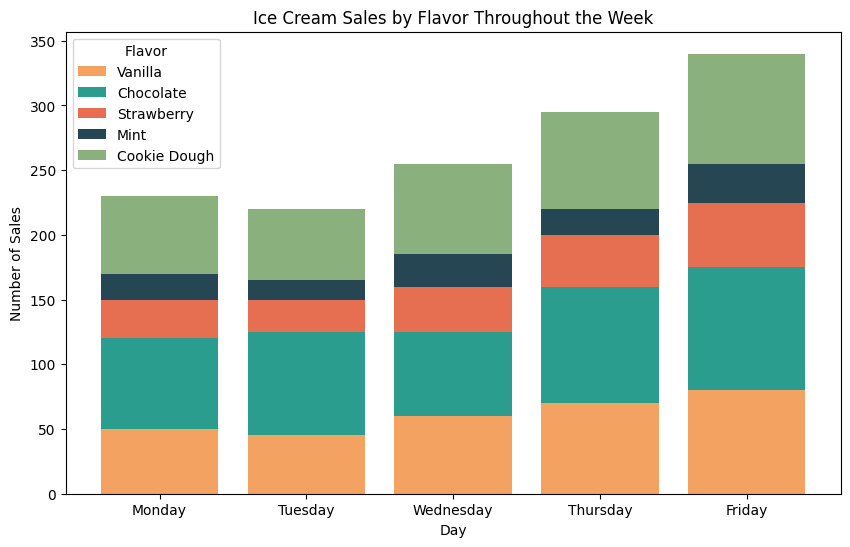

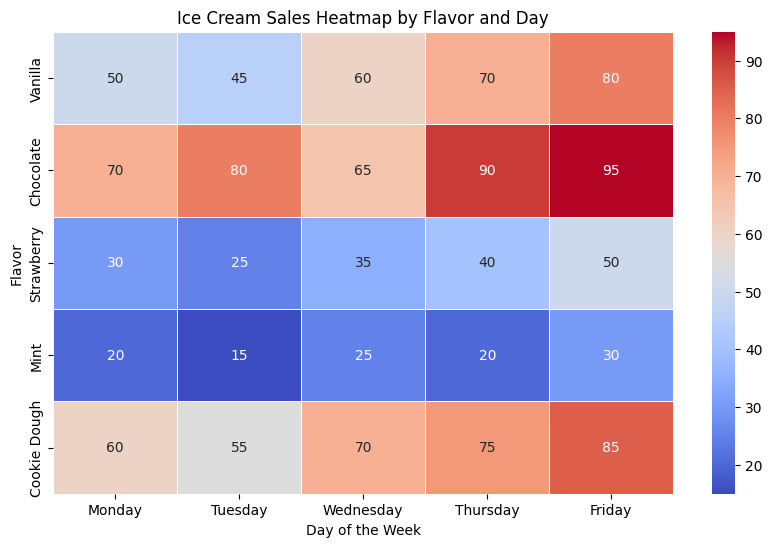

The most consistent flavor throughout the week is: Mint
The flavor with sales that spiked on certain days is: Vanilla


Flavor with the largest market share: Chocolate
Flavors that combined make up over 50% of total sales:
Empty DataFrame
Columns: [Flavor, Total Sales]
Index: []


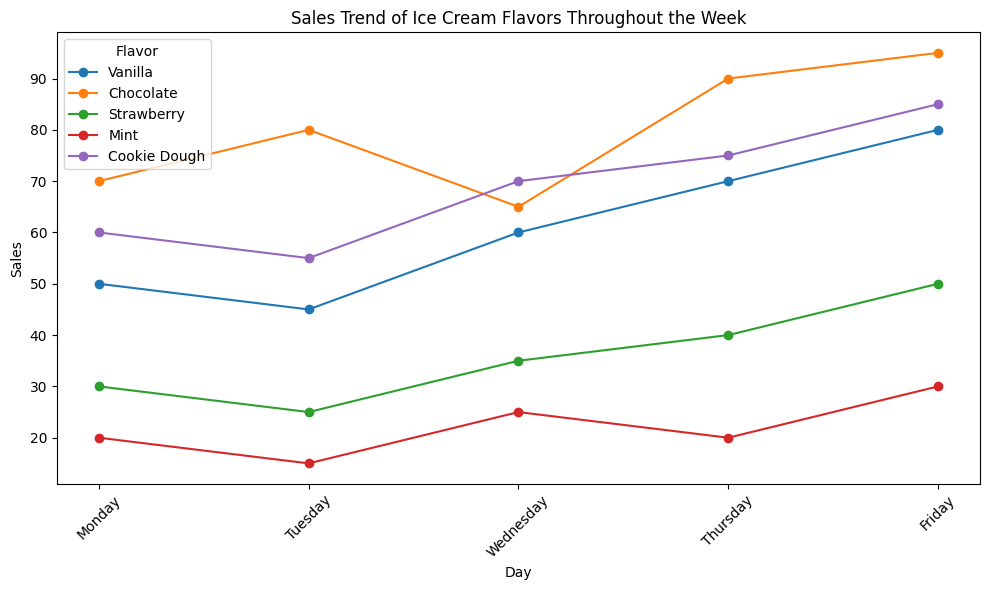

Flavor showing most growth from Monday to Friday: Vanilla
Flavors with decreasing trend: []


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

# First Question
# Ice cream shop sales
flavors = ['Vanilla', 'Chocolate', 'Strawberry', 'Mint', 'Cookie Dough']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sales = {
    'Vanilla': [50, 45, 60, 70, 80],
    'Chocolate': [70, 80, 65, 90, 95],
    'Strawberry': [30, 25, 35, 40, 50],
    'Mint': [20, 15, 25, 20, 30],
    'Cookie Dough': [60, 55, 70, 75, 85]
}

# Colors for each flavor
colors = ['#f4a261', '#2a9d8f', '#e76f51', '#264653', '#8ab17d']  # Replace these with preferred color codes

# Prepare data for plotting
daily_totals = np.array([sales[flavor] for flavor in flavors])
totals_by_day = daily_totals.sum(axis=0)
totals_by_flavor = daily_totals.sum(axis=1)

# Plotting a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(days)) 

# Plot each flavor on the stacked bar chart with the custom colors
for idx, (flavor, counts) in enumerate(zip(flavors, daily_totals)):
    ax.bar(days, counts, label=flavor, bottom=bottom, color=colors[idx])
    bottom += counts  

# Label and title
ax.set_title("Ice Cream Sales by Flavor Throughout the Week")
ax.set_xlabel("Day")
ax.set_ylabel("Number of Sales")
ax.legend(title="Flavor")
plt.show()



# Second Question
# Data for ice cream sales
data = {
    'Flavor': ['Vanilla', 'Chocolate', 'Strawberry', 'Mint', 'Cookie Dough'],
    'Monday': [50, 70, 30, 20, 60],
    'Tuesday': [45, 80, 25, 15, 55],
    'Wednesday': [60, 65, 35, 25, 70],
    'Thursday': [70, 90, 40, 20, 75],
    'Friday': [80, 95, 50, 30, 85]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the flavor as the index
df.set_index('Flavor', inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', linewidths=0.5, fmt='d')

# Customize the plot
plt.title('Ice Cream Sales Heatmap by Flavor and Day')
plt.xlabel('Day of the Week')
plt.ylabel('Flavor')
plt.show()

# Calculate the variance of sales for each flavor to determine consistency
sales_variance = df.var(axis=1)
most_consistent_flavor = sales_variance.idxmin()  # Flavor with the least variance
print(f'The most consistent flavor throughout the week is: {most_consistent_flavor}')

# Check for spikes in sales
sales_spikes = df.max(axis=1) - df.min(axis=1)  # Calculate the difference between max and min sales
flavor_with_spike = sales_spikes.idxmax()  # Flavor with the largest spike
print(f'The flavor with sales that spiked on certain days is: {flavor_with_spike}')



# Third Question
total_sales = df.sum(axis=1).reset_index()
total_sales.columns = ['Flavor', 'Total Sales']

# Create pie chart
fig = px.pie(total_sales, values='Total Sales', names='Flavor', title='Market Share of Ice Cream Flavors')
fig.show()

# Analyzing market share
largest_flavor = total_sales.loc[total_sales['Total Sales'].idxmax(), 'Flavor']
over_50_percent_flavors = total_sales[total_sales['Total Sales'] > (total_sales['Total Sales'].sum() * 0.5)]

print(f"Flavor with the largest market share: {largest_flavor}")
print("Flavors that combined make up over 50% of total sales:")
print(over_50_percent_flavors)



# Fourth Question
plt.figure(figsize=(10, 6))
for flavor in df.index:
    plt.plot(df.columns, df.loc[flavor], marker='o', label=flavor)
plt.title('Sales Trend of Ice Cream Flavors Throughout the Week')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Flavor')
plt.tight_layout()
plt.show()

# Analyzing growth and trends
growth = df.loc[:, 'Friday'] - df.loc[:, 'Monday']
most_growth_flavor = growth.idxmax()
decreasing_trends = df[df.iloc[:, -1] < df.iloc[:, 0]].index.tolist()

print(f"Flavor showing most growth from Monday to Friday: {most_growth_flavor}")
print(f"Flavors with decreasing trend: {decreasing_trends}")
